<a href="https://colab.research.google.com/github/pgordin/GraphsSN2024_1/blob/main/grafy_projekt_chordal_graph_natalia_stepien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coloring of chordal graphs

1. What is a chordal graph?

An undirected, simple graph G is called a chordal graph, **if every cycle on more than 3 vertices has a chord.**

---

2. Fulkerson & Gross (1965)
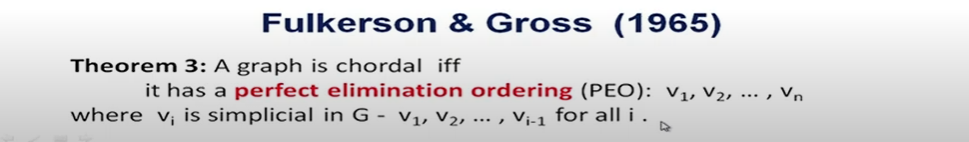

---
3. Lex BFS

In [ ]:
class Graph:
    def __init__(self, adjacency_list):
        #initializing the graph with an adjacency list
        self.adjacency_list = adjacency_list

    def lex_bfs(self, start_vertex):
        #initializing LexBFS algorithm starting from the given vertex

        #this is a sequence that will store the ordering of vertices
        ordering = []

        #priority structure to manage partitions of vertices
        partitions = [{start_vertex}, {v for v in self.adjacency_list if v != start_vertex}]

        #while there are partitions to process
        while partitions:
            #we can select any vertex from the first partition
            current_vertex = next(iter(partitions[0]))
            ordering.append(current_vertex) #add it to the ordering

            #remove the vertex from the first partition
            partitions[0].remove(current_vertex)

            #if the first partition becomes empty, remove it
            if not partitions[0]:
                partitions.pop(0)

            #update partitions based on neighbors of the current vertex
            new_partitions = []
            for partition in partitions:
                #split the current partition into two sets:
                #-one with neighbors of the current vertex
                #-one with non-neighbors
                neighbors = partition & set(self.adjacency_list[current_vertex])
                non_neighbors = partition - set(self.adjacency_list[current_vertex])

                #add the new subsets to the updated partitions
                if neighbors:
                    new_partitions.append(neighbors)
                if non_neighbors:
                    new_partitions.append(non_neighbors)

            #replace old partitions with the updated partitions
            partitions = new_partitions

        return ordering

adjacency_list = {
    'a': {'b', 'c'},
    'b': {'a', 'c', 'd', 'e', 'f'},
    'c': {'a', 'b', 'd', 'i', 'h'},
    'd': {'b', 'c', 'e', 'f', 'g', 'h'},
    'e': {'b', 'd', 'f', 'g'},
    'f': {'b', 'd', 'e', 'g'},
    'g': {'d', 'e', 'f'},
    'h': {'c', 'i', 'd'},
    'i': {'c', 'h', 'd'}
}


graph = Graph(adjacency_list)
lex_bfs_ordering = graph.lex_bfs(start_vertex='a')
print("LexBFS Ordering starting from 'a':", lex_bfs_ordering)


LexBFS Ordering starting from 'a': ['a', 'c', 'b', 'd', 'h', 'i', 'f', 'e', 'g']


In [ ]:
class Graph:
    def __init__(self, edges):
        #Here we start initializing the graph with an adjacency list
        self.graph = self.create_adjacency_list(edges)

    def create_adjacency_list(self, edges):
        #Creating adjacency list from the given edge list
        adjacency_list = {}
        for u, v in edges: #Iterating over each edge in the input list
            if u not in adjacency_list:  #If a vertex 'u' is not in the adjacency list, let's initialize it with an empty set
                adjacency_list[u] = set()
            if v not in adjacency_list: #Same for 'v'
                adjacency_list[v] = set()
            adjacency_list[u].add(v) #Adding 'v' to adjacency set of 'u' (creating an edge u -> v)
            adjacency_list[v].add(u) #Same for 'v', we can, because the graph is undirected
        return adjacency_list

    def lex_bfs(self, start='a'):
        #Perform Lexicographic BFS starting from the given vertex
        unvisited = set(self.graph.keys())  #All vertices are unvisited at the beggining
        peo = []  #The perfect elimination ordering
        labels = {v: set() for v in self.graph}  #Initialize labels for all vertices

        current = start  #Start with the given vertex
        while unvisited:
            peo.append(current)  #Add the current vertex to the peo
            unvisited.remove(current)  #Mark it as visited
            for neighbor in self.graph[current]:
                if neighbor in unvisited:  #Update labels for unvisited neighbors
                    labels[neighbor].add(len(peo))
            #Choose the unvisited vertex with the largest label
            current = max(unvisited, key=lambda v: (len(labels[v]), v)) if unvisited else None

        return peo


#Here are the edges of the graph
edges = [
    ('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'd'), ('b', 'f'), ('c', 'd'),
    ('b', 'e'), ('c', 'h'), ('h', 'i'), ('c', 'i'), ('d', 'e'),
    ('d', 'f'), ('e', 'f'), ('d', 'g'), ('e', 'g'), ('f', 'g'),
    ('d', 'h'), ('i', 'd')
]

#Creating the graph object
graph = Graph(edges)

#Performing of LexBFS starting from 'a' and printing the end result
lex_bfs_ordering = graph.lex_bfs(start='a')
print("LexBFS Ordering starting from 'a':", lex_bfs_ordering)


LexBFS Ordering starting from 'a': ['a', 'c', 'b', 'd', 'i', 'h', 'f', 'e', 'g']


4. Checking if a graph is chordal

In [ ]:
class Graph:
    def __init__(self, edges):
        #Here we start initializing the graph with an adjacency list
        self.graph = self.create_adjacency_list(edges)

    def create_adjacency_list(self, edges):
        #Creating adjacency list from the given edge list
        adjacency_list = {}
        for u, v in edges: #Iterating over each edge in the input list
            if u not in adjacency_list:  #If a vertex 'u' is not in the adjacency list, let's initialize it with an empty set
                adjacency_list[u] = set()
            if v not in adjacency_list: #Same for 'v'
                adjacency_list[v] = set()
            adjacency_list[u].add(v) #Adding 'v' to adjacency set of 'u' (creating an edge u -> v)
            adjacency_list[v].add(u) #Same for 'v', we can, because the graph is undirected
        return adjacency_list

    def lex_bfs(self, start='a'):
        #Perform Lexicographic BFS starting from the given vertex
        unvisited = set(self.graph.keys())  #All vertices are unvisited at the beggining
        peo = []  #The perfect elimination ordering
        labels = {v: set() for v in self.graph}  #Initialize labels for all vertices

        current = start  #Start with the given vertex
        while unvisited:
            peo.append(current)  #Add the current vertex to the peo
            unvisited.remove(current)  #Mark it as visited
            for neighbor in self.graph[current]:
                if neighbor in unvisited:  #Update labels for unvisited neighbors
                    labels[neighbor].add(len(peo))
            #Choose the unvisited vertex with the largest label
            current = max(unvisited, key=lambda v: (len(labels[v]), v)) if unvisited else None

        return peo

    def is_chordal(self):
        # check if the graph is chordal using the ChordalCheck algorithm
        peo = self.lex_bfs(next(iter(self.graph)))  # get PEO using LexBFS

        # for each vertex in PEO, check the clique condition
        for i, v in enumerate(peo):
            neighbors_in_peo = [u for u in self.graph[v] if u in peo[:i]]  #for every vertex v we look for neighboursthat are earlier in PEO
            if not neighbors_in_peo:
                continue
            w = max(neighbors_in_peo, key=lambda u: peo.index(u))  #find the neighbor with max index. From the earlier neighbours we choose the one that is the latest in peo and mark it as w
            # check if neighbors earlier in PEO form a clique
            clique_neighbors = set(neighbors_in_peo)
            if not clique_neighbors.issubset(self.graph[w].union({w})):  # include w itself for correctness
                return False  # if not a clique, the graph is not chordal
        return True


edges = [
    ('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'd'),('b','f'), ('c', 'd'),
    ('b', 'e'), ('c', 'h'), ('h', 'i'), ('c', 'i'), ('d', 'e'),
    ('d', 'f'), ('e', 'f'), ('d', 'g'), ('e', 'g'), ('f', 'g'),
    ('d', 'h'), ('i', 'd')
]

graph = Graph(edges)
print("Is this graph chordal?", graph.is_chordal())


Is this graph chordal? True


5. Graph coloring

In [ ]:
class Graph:
    def __init__(self, edges):
        #Here we start initializing the graph with an adjacency list
        self.graph = self.create_adjacency_list(edges)

    def create_adjacency_list(self, edges):
        #Creating adjacency list from the given edge list
        adjacency_list = {}
        for u, v in edges: #Iterating over each edge in the input list
            if u not in adjacency_list:  #If a vertex 'u' is not in the adjacency list, let's initialize it with an empty set
                adjacency_list[u] = set()
            if v not in adjacency_list: #Same for 'v'
                adjacency_list[v] = set()
            adjacency_list[u].add(v) #Adding 'v' to adjacency set of 'u' (creating an edge u -> v)
            adjacency_list[v].add(u) #Same for 'v', we can, because the graph is undirected
        return adjacency_list

    def lex_bfs(self, start='a'):
        #Perform Lexicographic BFS starting from the given vertex
        unvisited = set(self.graph.keys())  #All vertices are unvisited at the beggining
        peo = []  #The perfect elimination ordering
        labels = {v: set() for v in self.graph}  #Initialize labels for all vertices

        current = start  #Start with the given vertex
        while unvisited:
            peo.append(current)  #Add the current vertex to the peo
            unvisited.remove(current)  #Mark it as visited
            for neighbor in self.graph[current]:
                if neighbor in unvisited:  #Update labels for unvisited neighbors
                    labels[neighbor].add(len(peo))
            #Choose the unvisited vertex with the largest label
            current = max(unvisited, key=lambda v: (len(labels[v]), v)) if unvisited else None

        return peo

    def greedy_coloring(self, start):
        #get peo using LexBFS
        peo = self.lex_bfs(start)

        #dictionary to store colors for each vertex
        colors = {}
        for vertex in peo:
            #find colors of neighbours
            neighbor_colors = {colors[neighbor] for neighbor in self.graph[vertex] if neighbor in colors}
            #assign the smallest available color
            colors[vertex] = next(color for color in range(1, len(self.graph) + 1) if color not in neighbor_colors)

        return colors


edges = [
    ('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'd'), ('b', 'f'), ('c', 'd'),
    ('b', 'e'), ('c', 'h'), ('h', 'i'), ('c', 'i'), ('d', 'e'),
    ('d', 'f'), ('e', 'f'), ('d', 'g'), ('e', 'g'), ('f', 'g'),
    ('d', 'h'), ('i', 'd')
]

graph = Graph(edges)
colors = graph.greedy_coloring('a')
print("Vertex Coloring:", colors)


Vertex Coloring: {'a': 1, 'c': 2, 'b': 3, 'd': 1, 'i': 3, 'h': 4, 'f': 2, 'e': 4, 'g': 3}
